<a href="https://colab.research.google.com/github/ye-chem-group/CHEM-271/blob/main/ClausiusClapeyron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This python script demonstrates how to calculate ∆Hvap, the heat of vaporization, from vapor pressure (Pvap) vs temperature (T) data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
T = [200, 220, 240, 260, 280, 300]  # Temperature in Kelvin
P = [0.8, 4.5, 21, 71, 197, 391]    # Vapor pressure in mmHg (i.e., torr)

In [3]:
T = np.asarray(T) # Make both T and P numpy array
P = np.asarray(P)

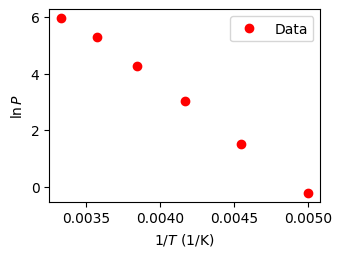

In [4]:
# Plot ln(P) as a function of 1/T to verify the Clausius–Claperon equation
# Expectation: ln(P)–1/T plot gives you a linear trend
fig = plt.figure(figsize=(3.5, 2.5))
ax = fig.gca()

# plot the data
xs = 1/T        # Inverse temperature
ys = np.log(P)  # Natural log of vapor pressure
ax.plot(xs, ys, 'o', color='red', label='Data')

# add axis labels
ax.legend()

# add axis labels
ax.set_xlabel(r'$1/T$ (1/K)')
ax.set_ylabel(r'$\ln P$')

plt.show()

In [5]:
# Perform linear regression between ln(P) and 1/T
xs = 1/T
ys = np.log(P)

slope, const = np.polyfit(xs, ys, deg=1) # degree = 1 means *linear* regression
print('Slope from linear regression is %.0f K' % slope)

Slope from linear regression is -3773 K


In [6]:
# Convert slope to ∆Hvap
R = 8.314  # J/(mol•K)

Delta_Hvap = slope * R  # J/mol
print('∆Hvap = %.0f J/mol' % Delta_Hvap )

Delta_Hvap = Delta_Hvap / 1000  # convert it to kJ/mol
print('∆Hvap = %.1f kJ/mol' % Delta_Hvap )

∆Hvap = -31372 J/mol
∆Hvap = -31.4 kJ/mol


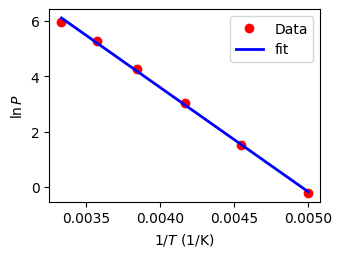

In [8]:
# Replot: data + fitted line
fig = plt.figure(figsize=(3.5, 2.5))
ax = fig.gca()

# plot the data
xs = 1/T        # Inverse temperature
ys = np.log(P)  # Natural log of vapor pressure
ax.plot(xs, ys, 'o', color='red', label='Data')

# plot the fitted line
ys_from_fit = slope * xs + const  # linear equation: y = k * x + b
ax.plot(xs, ys_from_fit, ls='-', lw=2, color='blue', label='linear fit')

# add legend
ax.legend()

# add axis labels
ax.set_xlabel(r'$1/T$ (1/K)')
ax.set_ylabel(r'$\ln P$')

plt.show()